In [41]:
import numpy as np
import cv2
import copy
import math
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy.linalg as linalg
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.linear_model import LogisticRegressionCV
from skimage.feature import hog
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.naive_bayes import GaussianNB
from skimage.feature import local_binary_pattern
import seaborn

In [42]:
#geeks for geeks 
def sort_list(list1, list2): 
  
    zipped_pairs = zip(list2, list1) 
  
    z = [x for _, x in sorted(zipped_pairs)] 
      
    return z 

In [43]:
def find_tpr_fpr(predict,real,checker):
    tp=0
    tn=0
    fp=0
#     print("find_tpr_fpr")
    fn=0
    voc=copy.deepcopy([0,1,2,3,4,5,6,7,8,9])
    v=voc.index(checker)
    del voc[v]
    for i in range(len(predict)):
        if predict[i]==checker and real[i]==checker:
            tp=tp+1
        if (predict[i] in voc ) and real[i]==checker:
            fn=fn+1
        if predict[i]==checker and (real[i] in voc):
            fp=fp+1
        if (predict[i] in voc) and (real[i] in voc):
            tn=tn+1
    tpr2=0
    fpr2=0
#     print("Total :",(tp+fp+tn+fn))
    tpr2=float(tp/float(tp+fn))   
    fpr2=float(fp/float(fp+tn))
    
    return tpr2,fpr2

In [44]:
def roc_design(prob_dist,testdata,checker):
    aux1=[]
    aux2=[]
    testdata1=copy.deepcopy(testdata)
    for i in range(len(testdata)):
        
        aux1.append(prob_dist[i])
        aux2.append(testdata[i])
    main1=sort_list(aux2, aux1)
#     print("Probability in incresing order : ",main1)
    
    tpr=[]
    fpr=[]
    #aux1 has prob_distribution and main1 has testlabel in sorted order
   
    main2=[]
    j=0
    for j in range(len(prob_dist)):
        main2.append(checker)
    i=0
    #Logic 
    if (checker+1)==9:
        flag=checker-1
    else:
        flag=checker+1
        
    while i <len(prob_dist):
        tpr1=0
        fpr1=0
        j=0
        
        while (j  <= i):
            main2[j]=flag
            j=j+1
#         j=i
#         while j <len(prob_dist):
#             main1[j]=2
#             j=j+1
#         print(main1)
#         m=[]
#         tpr.append(tpr1)
#         fpr.append(fpr1)
        tpr1,fpr1=find_tpr_fpr(copy.deepcopy(main2),copy.deepcopy(main1),checker)
#         e.append(testdata)
#         d.append(main1)
        fpr.append(fpr1)
        tpr.append(tpr1)
        
        i=i+25
    return tpr,fpr


In [45]:
#Cross validation 
def cross_validation_logistic(train_new,train_label2,train_size):
    train_label2=np.array(train_label2)
    fold=5
    model=[]
    score_set1=[]
    if len(train_new)%5==0:
        length=int(len(train_new)/5)
    else:
        length=int(len(train_new)/5)+1
    newlength=length
    counter=0
    for q in range(fold):

        if (max(len(train_new),length)==length):
            length=len(train_new)

        label=range(counter,length)
        counter=counter+newlength
        length=length+newlength
        a=[]
        for j in range(len(train_new)):
            if j not in label:
                a.append(j)

        valid_test_data=copy.deepcopy(train_new[label])
        valid_test_label=copy.deepcopy(train_label2[label])
        valid_train_data=[train_new[i] for i in a]
        valid_train_label=[train_label2[i] for i in a]
#         print(len(valid_train_data))
#         print(counter)
        clf = LogisticRegressionCV(random_state=0, solver='lbfgs',multi_class='multinomial').fit(np.array(valid_train_data), np.array(valid_train_label))
        
#         clf = LogisticRegressionCV().fit(np.array(valid_train_data),np.array(valid_train_label))
#         print(np.array(valid_train_data))
#         print("hello")
        b=clf.predict(np.array(valid_test_data))
        score1=clf.score(valid_test_data,valid_test_label)
        score_set1.append(score1)
        model.append(clf) 

    return model,score_set1
    
    

In [46]:
#Cross validation 
def cross_validation_gaussian(train_new,train_label2,train_size):
    train_label2=np.array(train_label2)
    fold=5
    model=[]
    score_set1=[]
    if len(train_new)%5==0:
        length=int(len(train_new)/5)
    else:
        length=int(len(train_new)/5)+1
    newlength=length
    counter=0
    for q in range(fold):

        if (max(len(train_new),length)==length):
            length=len(train_new)

        label=range(counter,length)
        counter=counter+newlength
        length=length+newlength
        a=[]
        for j in range(len(train_new)):
            if j not in label:
                a.append(j)

        valid_test_data=copy.deepcopy(train_new[label])
        valid_test_label=copy.deepcopy(train_label2[label])
        valid_train_data=[train_new[i] for i in a]
        valid_train_label=[train_label2[i] for i in a]
#         print(len(valid_train_data))
#         print(counter)
        clf = GaussianNB().fit(np.array(valid_train_data),np.array(valid_train_label))
#         print(np.array(valid_train_data))
#         print("hello")
        b=clf.predict(np.array(valid_test_data))
        score1=clf.score(valid_test_data,valid_test_label)
        score_set1.append(score1)
        model.append(clf) 

    return model,score_set1
    
    

In [47]:
size_local=255

In [48]:
def find_tpr_fpr(predict,real,checker):
    tp=0
    tn=0
    fp=0
#     print("find_tpr_fpr")
    fn=0
    voc=copy.deepcopy([0,1,2,3,4,5,6,7,8,9])
    v=voc.index(checker)
    del voc[v]
    for i in range(len(predict)):
        if predict[i]==checker and real[i]==checker:
            tp=tp+1
        if (predict[i] in voc ) and real[i]==checker:
            fn=fn+1
        if predict[i]==checker and (real[i] in voc):
            fp=fp+1
        if (predict[i] in voc) and (real[i] in voc):
            tn=tn+1
    tpr2=0
    fpr2=0
#     print("Total :",(tp+fp+tn+fn))
    tpr2=float(tp/float(tp+fn))   
    fpr2=float(fp/float(fp+tn))
    
    return tpr2,fpr2

In [49]:
def roc_design(prob_dist,testdata,checker):
    aux1=[]
    aux2=[]
    testdata1=copy.deepcopy(testdata)
    for i in range(len(testdata)):
        
        aux1.append(prob_dist[i])
        aux2.append(testdata[i])
    main1=sort_list(aux2, aux1)
#     print("Probability in incresing order : ",main1)
    
    tpr=[]
    fpr=[]
    main2=[]
    j=0
    for j in range(len(prob_dist)):
        main2.append(checker)
    i=0
    #Logic 
    if (checker+1)==10:
        flag=checker-1
    else:
        flag=checker+1
        
    while i <len(prob_dist):
        tpr1=0
        fpr1=0
        j=0
        
        while (j  <= i):
            main2[j]=flag
            j=j+1

        tpr1,fpr1=find_tpr_fpr(copy.deepcopy(main2),copy.deepcopy(main1),checker)
        fpr.append(fpr1)
        tpr.append(tpr1)
        
        i=i+10
    return tpr,fpr


In [50]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [51]:
#geeks for geeks 
def sort_list(list1, list2): 
  
    zipped_pairs = zip(list2, list1) 
  
    z = [x for _, x in sorted(zipped_pairs)] 
      
    return z 

In [52]:
pwd

'C:\\Users\\Dell-pc\\Desktop\\SML3\\cifar'

In [53]:
os.chdir('C:/Users/Dell-pc/Desktop/SML3/cifar')

In [54]:
list_dir=os.listdir()

In [55]:
test_data2=unpickle('test_batch')
train1=unpickle('data_batch_1')
train2=unpickle('data_batch_2')
train3=unpickle('data_batch_3')
train4=unpickle('data_batch_4')
train5=unpickle('data_batch_5')

In [56]:
length=10
data_set=[]
for i in range(length):
    data_set.append([])

In [57]:
test_label=[]
for i in range(len(test_data2[b'labels'])):
    test_label.append(int(test_data2[b'labels'][i]))


In [58]:
test_data=[]
for i in range(len(test_data2[b'data'])):
    img = np.reshape(test_data2[b'data'][i], (3, 32, 32))
    rgb = np.moveaxis(img, 0, 2)
#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
#     gray=np.round(gray)
#     gray=gray.ravel().tolist()
    test_data.append(rgb)

In [111]:
train_data=[]
train_label=[]
for i in range(len(train1[b'data'])):
    img = np.reshape(train1[b'data'][i], (3, 32, 32))
    rgb = np.moveaxis(img, 0, 2)
#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
# #     gray=np.round(gray)
#     gray=gray.ravel()
#     data_set[train1[b'labels'][i]].append(gray)
    train_data.append(rgb)
    train_label.append(train1[b'labels'][i])

for i in range(len(train2[b'data'])):
    img = np.reshape(train2[b'data'][i], (3, 32, 32))
    rgb = np.moveaxis(img, 0, 2)
#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
# #     gray=np.round(gray)
#     gray=gray.ravel()
#     data_set[train2[b'labels'][i]].append(gray)
    train_data.append(rgb)
    train_label.append(train2[b'labels'][i])

for i in range(len(train3[b'data'])):
    img = np.reshape(train3[b'data'][i], (3, 32, 32))
    rgb = np.moveaxis(img, 0, 2)
#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
# #     gray=np.round(gray)
#     gray=gray.ravel()
#     data_set[train3[b'labels'][i]].append(gray)
    train_data.append(rgb)
    train_label.append(train3[b'labels'][i])
    

for i in range(len(train4[b'data'])):
    img = np.reshape(train4[b'data'][i], (3, 32, 32))
    rgb = np.moveaxis(img, 0, 2)
#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
# #     gray=np.round(gray)
#     gray=gray.ravel()
#     data_set[train4[b'labels'][i]].append(gray)
    train_data.append(rgb)
    train_label.append(train4[b'labels'][i])


for i in range(len(train5[b'data'])):
    img = np.reshape(train5[b'data'][i], (3, 32, 32))
    rgb = np.moveaxis(img, 0, 2)
#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
#     gray=np.round(gray)
#     gray=gray.ravel()
#     data_set[train5[b'labels'][i]].append(gray)
    train_data.append(rgb)
    train_label.append(train5[b'labels'][i])
    
    
    
        
  

In [112]:
train_data=np.array(train_data)

In [113]:
train_data[0].shape

(32, 32, 3)

In [114]:
set(train_label)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [115]:
radius=3
n_points=8*radius
METHOD="uniform"

In [120]:
train_data[0].shape

(32, 32, 3)

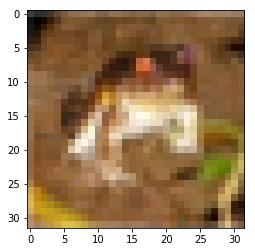

In [117]:
plt.imshow(train_data[0])
plt.show()

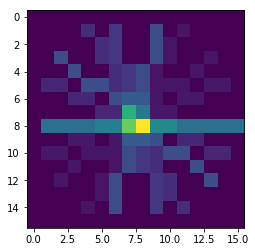

In [125]:
gray== cv2.cvtColor(train_data[0], cv2.COLOR_BGR2GRAY)
fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(16, 16),cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_image.reshape(16,16))
plt.show()

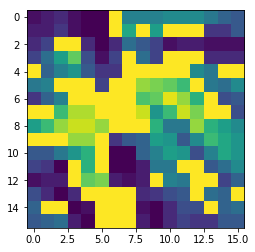

In [123]:
gray== cv2.cvtColor(train_data[0], cv2.COLOR_BGR2GRAY)
lbp = local_binary_pattern(gray, n_points, radius, METHOD)
plt.imshow(lbp.reshape(16,16))
plt.show()

In [63]:
def patch_calc(train,size):
    r=int(size/2)
    split_h=np.hsplit(train,r)
    splits_main=[]
    for i in range(len(split_h)):
        split_v=np.vsplit(split_h[i],r)
        splits_main+=split_v
    return np.array(splits_main)

In [64]:
patches=[]
for i in range(len(set(train_label))):
    patches.append([])
for i in range(len(train_data)):
    pat=patch_calc(train_data[i],4)
    patches[train_label[i]].append(pat)

In [65]:
patches_test=[]
for i in range(len(set(test_label))):
    patches_test.append([])
for i in range(len(test_label)):
    pat=patch_calc(test_data[i],4)
    patches_test[test_label[i]].append(pat)

In [66]:
patches=np.array(patches)
patches_test=np.array(patches_test)

# For HOG Feature

# Bag of Words

In [138]:
bow=[]
for i in range(len(patches)):
    temp2=[]
    for j in range(len(patches[i])):
        temp1=[]
        for k in range(len(patches[i][j])):
            gray = cv2.cvtColor(patches[i][j][k], cv2.COLOR_BGR2GRAY)
            fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
            temp1.append(fd.tolist())
#             temp1.append(i)
        temp2.append(np.array(temp1))
    bow.append(np.array(temp2))
bow=np.array(bow)

In [139]:
bow.shape

(10, 5000, 4, 36)

In [141]:
bow=bow.reshape(10*5000*4,36)

In [142]:
kmeans = KMeans(n_clusters=30, random_state=0).fit(bow)

In [143]:
representatives=kmeans.cluster_centers_

# Making training set

In [144]:
train_data=[]
train_label=[]
flag=0
show=[]
counter=0
for i in range(len(patches)):
    for j in range(len(patches[i])):
        main=[0]*50
        if flag==1:
            break
        for k in range(len(patches[i][j])):
            gray = cv2.cvtColor(patches[i][j][k], cv2.COLOR_BGR2GRAY)
            fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
            if counter<10:
                
                show.append(hog_image)
            euc=euclidean_distances(representatives, [fd])
            counter+=1
#             main.append(euc.ravel())
            main[np.argmax(euc)]+=1
            
            
            
#             temp1.append(i)
#         main=np.array(main)
        train_label.append(i)
        train_data.append(main)
       
            


In [ ]:
# for i in range(len(show)):
#     plt.imshow(show[i])
#     plt.show()


In [145]:
train_size=len(train_data)
fold=5

In [146]:
X_train=[]
for i in range(len(train_data)):
    temp=[]
    temp.append(train_data[i])
    temp.append(train_label[i])
    X_train.append(temp)
shuffled_data=random.sample(X_train, len(X_train))

In [147]:
train_data=[]
train_label=[]
for i in range(len(shuffled_data)):
    train_data.append(shuffled_data[i][0])
    train_label.append(shuffled_data[i][1])

In [148]:
np.array(train_data).shape

(50000, 50)

# Making Test set

In [149]:
test_data=[]
test_label=[]
for i in range(len(patches_test)):
 
    for j in range(len(patches_test[i])):
        main=[0]*50
        for k in range(len(patches_test[i][j])):
            gray = cv2.cvtColor(patches[i][j][k], cv2.COLOR_BGR2GRAY)
            fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
            euc=euclidean_distances(representatives, [fd])
#             main.append(euc.ravel())
            main[np.argmax(euc)]+=1
            
            
            
#             temp1.append(i)
#         main=np.array(main)
        test_label.append(i)
        test_data.append(main)
       
            


In [150]:
model,score_set=cross_validation_logistic(np.array(train_data),np.array(train_label),train_size)

In [151]:
score_mean=np.mean(score_set)
standard_dev=np.std(score_set)
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)

Standard deviation :  0.004128728617867732
Mean of accuracy : 0.12806
Accuracy for each validation :  [0.1293, 0.123, 0.1308, 0.1336, 0.1236]


In [152]:
best=model[np.argmax(score_set)]
best_score=best.score(test_data,test_label)
prob_dist=best.predict_proba(test_data).tolist()
label_pred=best.predict(test_data).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

Test Accuracy by best model in cross validation :  0.1287


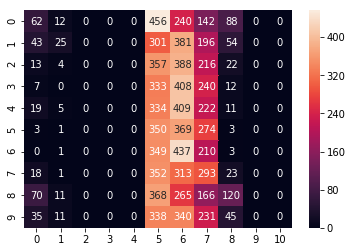

In [153]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(data_set)):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label[i]][label_pred[i]]=confusionmatrix[test_label[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

KeyboardInterrupt: 

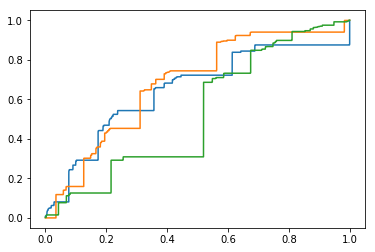

In [98]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(10):
    tpr,fpr=roc_design(prob_dist[i],test_label,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Class 1 to 10")
plt.show()

# LBP feature set

# Bag of Words

In [103]:
bow_lbp=[]
for i in range(len(patches)):
    temp2=[]
    for j in range(len(patches[i])):
        temp1=[]
        for k in range(len(patches[i][j])):
            gray = cv2.cvtColor(patches[i][j][k], cv2.COLOR_BGR2GRAY)
            lbp = local_binary_pattern(gray, n_points, radius, METHOD)
#             fd, hog_image = hog(patches[i][j][k], orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True, multichannel=True)
            temp1.append(lbp.ravel().tolist())
#             temp1.append(i)
        temp2.append(np.array(temp1))
    bow_lbp.append(np.array(temp2))
bow_lbp=np.array(bow_lbp)

In [104]:
bow_lbp=bow_lbp.reshape(10*5000*4,256)

In [126]:
kmeans_lbp = KMeans(n_clusters=40, random_state=0).fit(bow_lbp)

In [127]:
representatives_lbp=kmeans_lbp.cluster_centers_

In [128]:
train_data=[]
train_label=[]
show=[]
counter=0
for i in range(len(patches)):

    for j in range(len(patches[i])):
        main=[0]*50
        for k in range(len(patches[i][j])):
            gray = cv2.cvtColor(patches[i][j][k], cv2.COLOR_BGR2GRAY)
            lbp = local_binary_pattern(gray, n_points, radius, METHOD)
            if counter<10:
                
                show.append(lbp)
            counter+=1
            euc=euclidean_distances(representatives_lbp, [lbp.ravel()])
#             main.append(euc.ravel())
            main[np.argmax(euc)]+=1
        train_label.append(i)
        train_data.append(main)
       
            


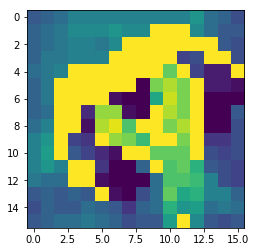

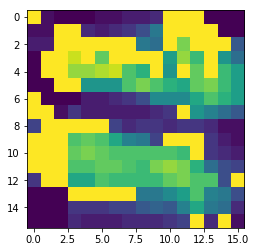

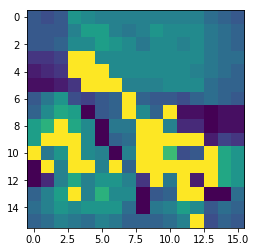

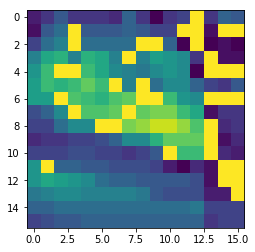

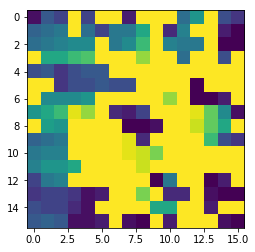

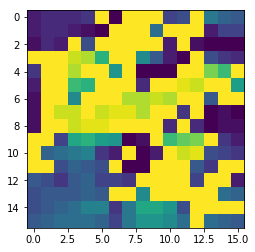

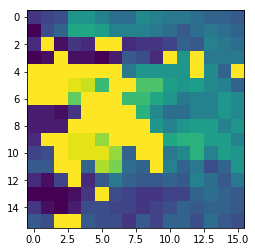

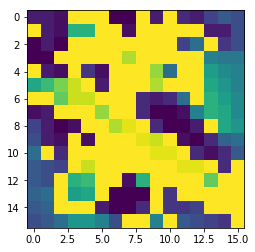

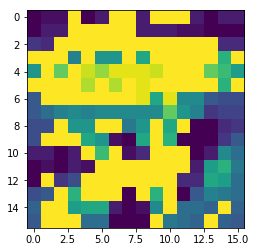

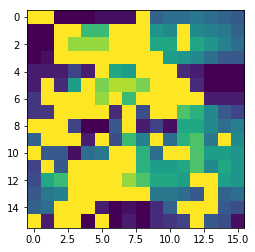

In [129]:
for i in range(len(show)):
    plt.imshow(show[i])
    plt.show()


In [130]:
train_size=len(train_data)
fold=5

In [131]:
X_train=[]
for i in range(len(train_data)):
    temp=[]
    temp.append(train_data[i])
    temp.append(train_label[i])
    X_train.append(temp)
shuffled_data=random.sample(X_train, len(X_train))

In [132]:
train_data=[]
train_label=[]
for i in range(len(shuffled_data)):
    train_data.append(shuffled_data[i][0])
    train_label.append(shuffled_data[i][1])

# Making Test set

In [133]:
test_data_lbp=[]
test_label_lbp=[]
for i in range(len(patches_test)):
 
    for j in range(len(patches_test[i])):
        main=[0]*50
        for k in range(len(patches_test[i][j])):
            gray = cv2.cvtColor(patches[i][j][k], cv2.COLOR_BGR2GRAY)
            lbp = local_binary_pattern(gray, n_points, radius, METHOD)
            euc=euclidean_distances(representatives_lbp, [lbp.ravel()])
#             main.append(euc.ravel())
            main[np.argmax(euc)]+=1
            
            
            
#             temp1.append(i)
#         main=np.array(main)
        test_label_lbp.append(i)
        test_data_lbp.append(main)
       
            


In [134]:
model,score_set=cross_validation_logistic(np.array(train_data),np.array(train_label),train_size)

In [135]:
score_mean=np.mean(score_set)
standard_dev=np.std(score_set)
print("Standard deviation : ",standard_dev)
print("Mean of accuracy :",score_mean)
print("Accuracy for each validation : ",score_set)
best=model[np.argmax(score_set)]
best_score=best.score(test_data_lbp,test_label_lbp)
prob_dist=best.predict_proba(test_data_lbp).tolist()
label_pred=best.predict(test_data_lbp).tolist()
print("Test Accuracy by best model in cross validation : ",best_score)

Standard deviation :  0.0024730547911439352
Mean of accuracy : 0.1819
Accuracy for each validation :  [0.1781, 0.1809, 0.1831, 0.1818, 0.1856]
Test Accuracy by best model in cross validation :  0.1828


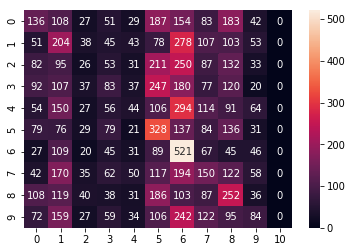

In [136]:
#Confusion Matrix
confusionmatrix=[]
temp=[0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(data_set)):
    confusionmatrix.append(temp)
    temp=copy.deepcopy(temp)
for i in range(len(test_label)):
    confusionmatrix[test_label_lbp[i]][label_pred[i]]=confusionmatrix[test_label_lbp[i]][label_pred[i]]+1
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

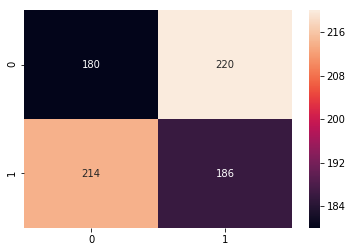

In [154]:
confusionmatrix=[[180,220],[214,186]]
seaborn.heatmap(confusionmatrix,annot=True,fmt="d")   

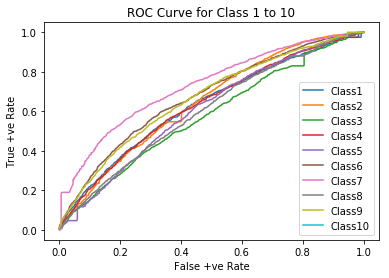

In [284]:
# ROC Curve 
prob_dist=np.transpose(prob_dist)
for i in range(10):
    tpr,fpr=roc_design(prob_dist[i],test_label_lbp,i)
    plt.plot(fpr, tpr ,label="Class"+str(i+1))
# roccurve(prob_dist,test_label)
plt.xlabel("False +ve Rate")
plt.ylabel("True +ve Rate")
plt.legend()
plt.title("ROC Curve for Class 1 to 10")
plt.show()